# Independence sampler

Normal Mixture
$pN(μ1, σ21) + (1 − p)N(μ2, σ2)$

pdf: $f^{*}=pf_{1}(z) + (1 − p)f_{2}(z)$<br>
여기서 $f_{1},f_{2}$는 각각의 normal pdf

density $f_{1},f_{2}$가 잘 설정 됐다고 할때, observed sample이 주어졌을 때 mixing parameter p를 어떻게 추정할까?

Proposal: Beta(1,1) (Uniform)<br>
$g(y) \sim y^{\alpha}(1-y)^{\beta}$

$\frac{f(y)g(x_{t})}{f(x_{t})g(y)} = \frac{x_{t}^{\alpha-1}(1-x_{t})^{\beta-1} \prod [yf_{1}(z_{j}) + (1-y)f_{2}(z_{j})]   }{y^{\alpha-1}(1-y)^{\beta-1} \prod [x_{t}f_{1}(z_{j}) + (1-x_{t})f_{2}(z_{j})]  }        $

data는 0.2N(0, 1) + 0.8N(5, 1)에서 생성

In [2]:
m <- 5000 #length of chain
xt <- numeric(m)
a <- 1 #parameter of Beta(a,b) proposal dist.
b <- 1 #parameter of Beta(a,b) proposal dist.
p <- .2 #mixing parameter
n <- 30 #sample size
mu <- c(0, 5) #parameters of the normal densities
sigma <- c(1, 1)



In [ ]:
# generate the observed sample
i <- sample(1:2, size=n, replace=TRUE, prob=c(p, 1-p))
x <- rnorm(n, mu[i], sigma[i])

In [9]:
i
x

[1] 5000

[1]  4.675295  3.189915  4.805217  4.955424  6.300796  5.048207  3.855209
 [8]  5.502609  5.502694  3.816630  7.035990  4.338772  6.474465  4.883778
[15] -1.196639  3.575653  5.282287 -1.316992  6.225183  5.310941  4.270652
[22]  6.079407  5.689400  4.469961  3.428519  6.110343  4.878973  4.949757
[29]  5.465876  3.215125

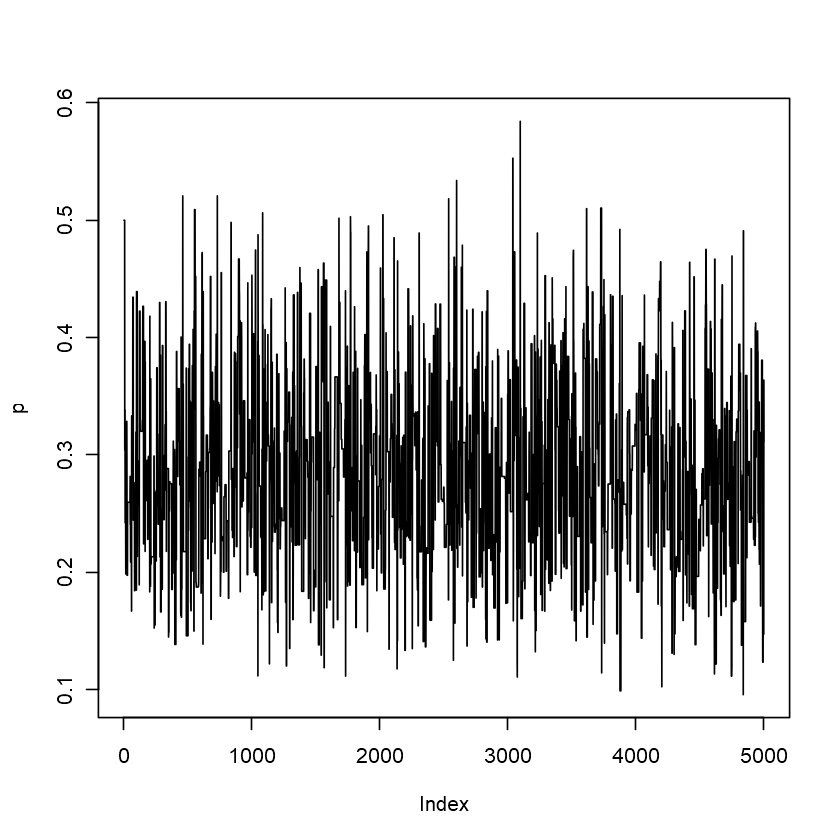

[1] 0.2863573


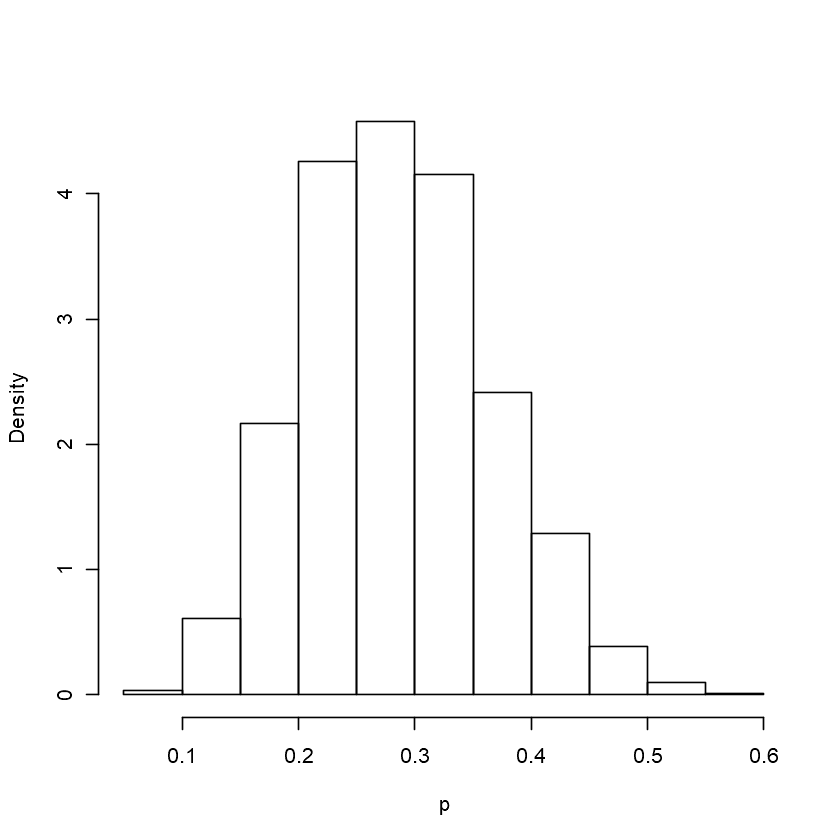

In [4]:
# generate the independence sampler chain
u <- runif(m)
y <- rbeta(m, a, b) #proposal distribution
xt[1] <- .5
for (i in 2:m) {
fy <- y[i] * dnorm(x, mu[1], sigma[1]) +
(1-y[i]) * dnorm(x, mu[2], sigma[2])
fx <- xt[i-1] * dnorm(x, mu[1], sigma[1]) +
(1-xt[i-1]) * dnorm(x, mu[2], sigma[2])
r <- prod(fy / fx) *
(xt[i-1]^(a-1) * (1-xt[i-1])^(b-1)) /
(y[i]^(a-1) * (1-y[i])^(b-1))
if (u[i] <= r) xt[i] <- y[i] else
xt[i] <- xt[i-1]
}
plot(xt, type="l", ylab="p")
hist(xt[101:m], main="", xlab="p", prob=TRUE)
print(mean(xt[101:m]))

생성된 chain의 traceplot 봤을 때 mixes well and converges quickly to a stationary distribution.

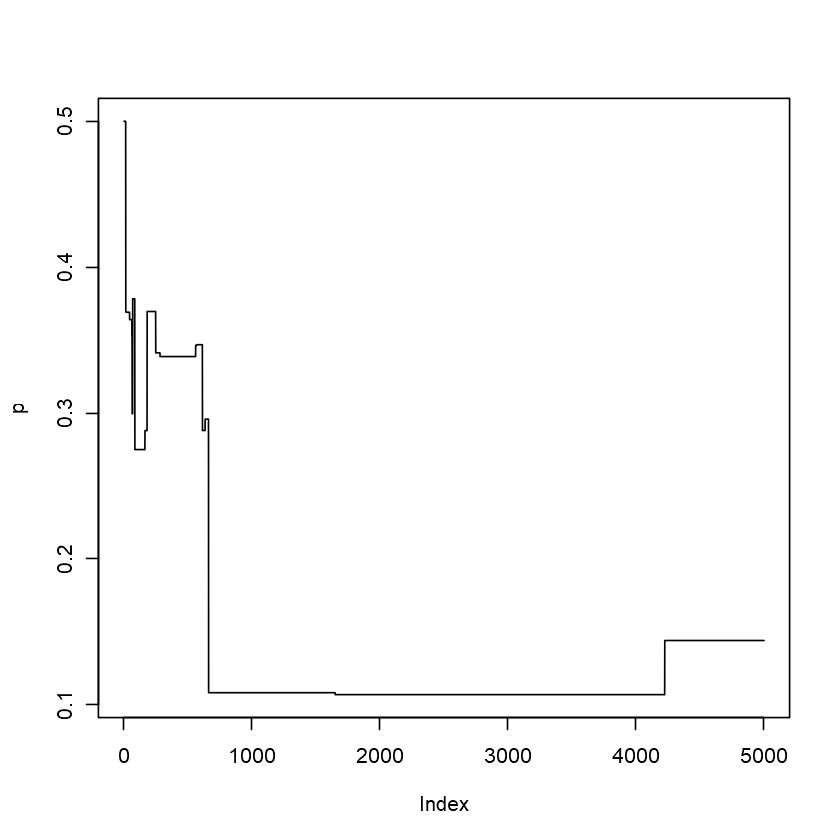

[1] 0.1387287


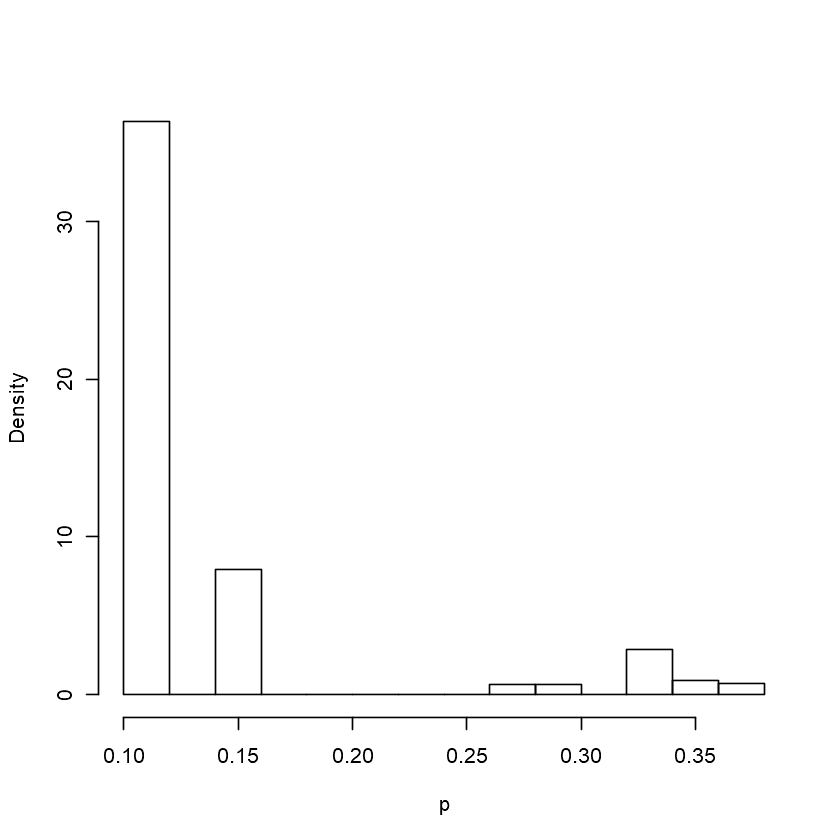

In [8]:
m <- 5000 #length of chain
xt <- numeric(m)
a <- 5 #parameter of Beta(a,b) proposal dist.
b <- 2 #parameter of Beta(a,b) proposal dist.
p <- .2 #mixing parameter
n <- 30 #sample size
mu <- c(0, 5) #parameters of the normal densities
sigma <- c(1, 1)
# generate the observed sample
i <- sample(1:2, size=n, replace=TRUE, prob=c(p, 1-p))
x <- rnorm(n, mu[i], sigma[i])
# generate the independence sampler chain
u <- runif(m)
y <- rbeta(m, a, b) #proposal distribution
xt[1] <- .5
for (i in 2:m) {
fy <- y[i] * dnorm(x, mu[1], sigma[1]) +
(1-y[i]) * dnorm(x, mu[2], sigma[2])
fx <- xt[i-1] * dnorm(x, mu[1], sigma[1]) +
(1-xt[i-1]) * dnorm(x, mu[2], sigma[2])
r <- prod(fy / fx) *
(xt[i-1]^(a-1) * (1-xt[i-1])^(b-1)) /
(y[i]^(a-1) * (1-y[i])^(b-1))
if (u[i] <= r) xt[i] <- y[i] else
xt[i] <- xt[i-1]
}
plot(xt, type="l", ylab="p")
hist(xt[101:m], main="", xlab="p", prob=TRUE)
print(mean(xt[101:m]))

Beta(5,2)를 proposal distribution로 하면 결과가 안 좋음

In [11]:
y[1]*dnorm(x, mu[1], sigma[1])

[1] 6.290804e-06 2.165708e-03 3.398139e-06 1.632591e-06 8.403133e-10
 [6] 1.026429e-06 2.078805e-04 9.338039e-08 9.333689e-08 2.410364e-04
[11] 6.241448e-12 2.866887e-05 2.771186e-10 2.322483e-06 1.714948e-01
[16] 5.873578e-04 3.063588e-07 1.474209e-01 1.349295e-09 2.632203e-07
[21] 3.843808e-05 3.308317e-09 3.283196e-08 1.608687e-05 9.832958e-04
[26] 2.739817e-09 2.377604e-06 1.679058e-06 1.142210e-07 1.997732e-03